# Data cleansing notes on removed records:

## See data_engineering.ipynb for more details.

### Measurement Records Information
    19,550 total records before changes
    1,447 records with blank precipitation (col = "prcp")
    18,103 records with no known issues after removing 1,447 with blank prcp
    Percentage of records removed is 0.07%
    Percentage of records remaining is 93.0%


In [1]:
## Dependencies
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(sum(map(ord, "aesthetics")))
import datetime as dt
from datetime import datetime, date, time

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, and_

In [2]:
# Create an engine for the hawaii.sqlite database
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [3]:
# Use the Inspector to explore the database
inspector = inspect(engine)
inspector.get_table_names()

['station', 'weather']

In [4]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('weather')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [5]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [6]:
# Reflect hawaii database table station into its ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
station = Base.classes.station

In [7]:
# Reflect hawaii database table weather into it's ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
weather = Base.classes.weather

In [8]:
# Start a session to query the database
session = Session(engine)

# Queries for Station Analysis Year 2015

In [9]:
# Get count of the stations by using scalar()
session.query(func.count(station.id)).scalar()

9

In [10]:
# Count the number of tobs per weather station in desc order
s_tobs_cnt = session.query(weather.station, func.count(weather.tobs)).\
    filter(weather.date.between('2015-01-01','2015-12-31')).\
    group_by(weather.station).order_by(func.count(weather.tobs).desc()).all()
s_tobs_cnt

[('USC00519281', 364),
 ('USC00519397', 360),
 ('USC00513117', 329),
 ('USC00516128', 322),
 ('USC00519523', 322),
 ('USC00514830', 261),
 ('USC00511918', 153),
 ('USC00517948', 54),
 ('USC00518838', 10)]

In [11]:
# Station - USC00511918 HONOLULU OBSERVATORY 702.2, HI US
s519281 = session.query(weather.date, weather.tobs).\
 filter(and_(weather.date.between('2015-01-01','2015-12-31'), weather.station == 'USC00519281')).\
 order_by(weather.date.asc()).all()
s519281

[('2015-01-01', 66.0),
 ('2015-01-02', 60.0),
 ('2015-01-03', 67.0),
 ('2015-01-04', 65.0),
 ('2015-01-05', 56.0),
 ('2015-01-06', 64.0),
 ('2015-01-07', 64.0),
 ('2015-01-08', 62.0),
 ('2015-01-09', 64.0),
 ('2015-01-10', 66.0),
 ('2015-01-11', 69.0),
 ('2015-01-12', 60.0),
 ('2015-01-13', 58.0),
 ('2015-01-14', 63.0),
 ('2015-01-15', 65.0),
 ('2015-01-16', 68.0),
 ('2015-01-17', 70.0),
 ('2015-01-18', 67.0),
 ('2015-01-19', 71.0),
 ('2015-01-20', 68.0),
 ('2015-01-21', 62.0),
 ('2015-01-22', 61.0),
 ('2015-01-23', 72.0),
 ('2015-01-24', 66.0),
 ('2015-01-25', 65.0),
 ('2015-01-26', 65.0),
 ('2015-01-27', 65.0),
 ('2015-01-28', 66.0),
 ('2015-01-29', 69.0),
 ('2015-01-30', 63.0),
 ('2015-01-31', 69.0),
 ('2015-02-01', 62.0),
 ('2015-02-02', 67.0),
 ('2015-02-03', 76.0),
 ('2015-02-04', 74.0),
 ('2015-02-05', 66.0),
 ('2015-02-06', 58.0),
 ('2015-02-07', 70.0),
 ('2015-02-08', 66.0),
 ('2015-02-09', 72.0),
 ('2015-02-10', 68.0),
 ('2015-02-11', 64.0),
 ('2015-02-12', 60.0),
 ('2015-02-

In [12]:
# put data into a data frame for charting
s519281_df = pd.DataFrame(s519281) 
print(len(s519281_df.index))
s519281_df.info()
s519281_df.head(5)

364
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
date    364 non-null object
tobs    364 non-null float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


,date,tobs
0,2015-01-01,66.0
1,2015-01-02,60.0
2,2015-01-03,67.0
3,2015-01-04,65.0
4,2015-01-05,56.0


In [13]:
# Summary Statistics Station - USC00511918 HONOLULU OBSERVATORY 702.2, HI US
s519281_df.describe()

,tobs
count,364.000000
mean,71.898352
std,5.199396
min,56.000000
25%,69.000000
50%,72.000000
75%,75.000000
max,85.000000


<IPython.core.display.Javascript object>


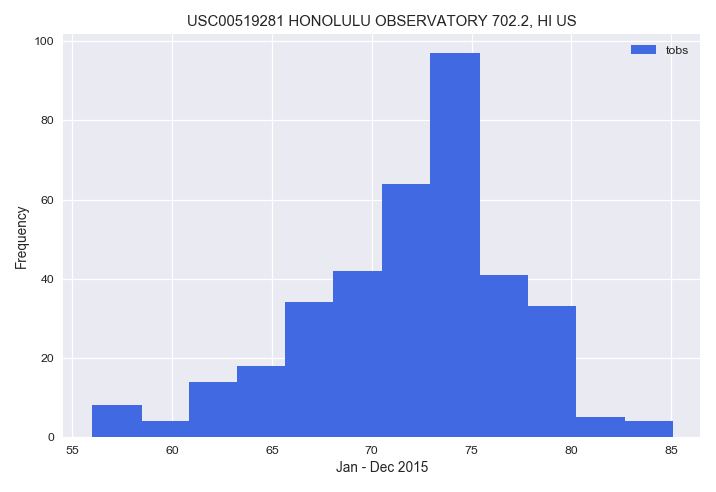

In [14]:
# Pandas DataFrame.plot(kind='hist')

ax = s519281_df.plot(kind='hist',color='royalblue', width=2.5, bins=12, 
                    title="USC00519281 HONOLULU OBSERVATORY 702.2, HI US")
ax.set_xlabel("Jan - Dec 2015")
ax.set_ylabel("Frequency")

plt.tight_layout()
plt.savefig("Station-USC00519281_tobs_jan-dec-2015.png")
plt.show()